### **PHISHING URL DETECTION- PHASE 2**

**Name**: Aneeta Abraham

**Organisation:** Entri Elevate

**Date:**: 03/03/25

## 1. **Overview of Problem Statement:**

Phishing attacks are one of the most common cyber threats, costing individuals and organizations billions annually. Attackers use deceptive URLs to steal sensitive information like passwords, credit card details, and personal data. Traditional methods of detecting phishing URLs (e.g., blacklists) are reactive and fail to catch new threats. This project aims to build a **proactive phishing detection system** using machine learning to analyze URL features and classify them as malicious or safe.


## 2. **Objective:**

Develop a machine learning model to classify URLs as **phishing** or **legitimate** based on features extracted from the URL and its metadata. The goal is to create a robust system that can detect phishing attempts in real-time, protecting users from cyber threats.


## 3. **Data Description:**



 **URL & Domain-Based Features**
 
1. **FILENAME** – Name of the file containing the dataset entry.  
2. **URL** – The full web address being analyzed.  
3. **URLLength** – Total length of the URL (longer URLs may be suspicious).  
4. **Domain** – The main domain of the URL (e.g., `example.com`).  
5. **DomainLength** – Length of the domain (long domains can indicate phishing).  
6. **IsDomainIP** – Whether the domain is an IP address (`1` = Yes, `0` = No).  
7. **TLD** – The top-level domain (e.g., `.com`, `.org`, `.xyz`).  
8. **TLDLegitimateProb** – Probability of the TLD being legitimate based on past data.  


 **Character-Based Features**
 
9. **URLSimilarityIndex** – Similarity score with known trusted URLs.  
10. **CharContinuationRate** – Measures repeated character patterns in the URL.  
11. **URLCharProb** – Probability distribution of characters in the URL.  
12. **TLDLength** – Length of the top-level domain.  
13. **NoOfSubDomain** – Number of subdomains (more subdomains can indicate phishing).  
14. **HasObfuscation** – Whether the URL contains obfuscation techniques (`1` = Yes).  
15. **NoOfObfuscatedChar** – Number of obfuscated characters in the URL.  
16. **ObfuscationRatio** – Ratio of obfuscated characters to total URL length.  
17. **NoOfLettersInURL** – Count of alphabetic characters in the URL.  
18. **LetterRatioInURL** – Ratio of letters to the total URL length.  
19. **NoOfDigitsInURL** – Number of numeric digits in the URL.  
20. **DigitRatioInURL** – Ratio of numeric digits to the total URL length.  
21. **NoOfEqualsInURL** – Number of `=` characters in the URL (used in tracking links).  
22. **NoOfQMarkInURL** – Number of `?` characters (common in phishing).  
23. **NoOfAmpersandInURL** – Number of `&` characters in the URL.  
24. **NoOfOtherSpecialCharsInURL** – Count of other special characters (`@`, `%`, etc.).  
25. **SpecialCharRatioInURL** – Ratio of special characters to total URL length.  


 **Security & HTTPS Features**
 
26. **IsHTTPS** – Whether the URL uses HTTPS (`1` = Yes, `0` = No).  


 **Web Page Content Features**
 
27. **LineOfCode** – Number of lines in the HTML source code.  
28. **LargestLineLength** – Length of the longest line in the source code.  
29. **HasTitle** – Whether the web page has a `<title>` tag (`1` = Yes).  
30. **Title** – The text inside the `<title>` tag.  
31. **DomainTitleMatchScore** – Similarity score between domain name and page title.  
32. **URLTitleMatchScore** – Similarity score between URL and page title.  
33. **HasFavicon** – Whether the page has a favicon (`1` = Yes).  


 **Website Behavior Features**
 
34. **Robots** – Whether the website has a `robots.txt` file (`1` = Yes).  
35. **IsResponsive** – Whether the website is mobile-responsive (`1` = Yes).  
36. **NoOfURLRedirect** – Number of times the URL redirects.  
37. **NoOfSelfRedirect** – Number of self-redirects within the same domain.  


**Social & Interactive Features**

38. **HasDescription** – Whether the page has a meta description (`1` = Yes).  
39. **NoOfPopup** – Number of pop-ups on the website.  
40. **NoOfiFrame** – Number of `<iframe>` elements (often used in phishing).  
41. **HasExternalFormSubmit** – Whether the page submits data to an external domain.  
42. **HasSocialNet** – Whether the page contains social media links.  
43. **HasSubmitButton** – Whether the page has a submit button (`1` = Yes).  
44. **HasHiddenFields** – Whether the page contains hidden form fields.  
45. **HasPasswordField** – Whether the page has an input field for passwords.  


 **Financial & Phishing Keywords**
 
46. **Bank** – Whether the URL contains bank-related words (`1` = Yes).  
47. **Pay** – Whether the URL contains payment-related words (`1` = Yes).  
48. **Crypto** – Whether the URL contains cryptocurrency-related words (`1` = Yes).  


**Multimedia & External Links**

49. **HasCopyrightInfo** – Whether the page has copyright information.  
50. **NoOfImage** – Number of images on the webpage.  
51. **NoOfCSS** – Number of CSS files linked in the HTML.  
52. **NoOfJS** – Number of JavaScript files linked in the HTML.  
53. **NoOfSelfRef** – Number of self-referencing links in the HTML.  
54. **NoOfEmptyRef** – Number of empty or broken links.  
55. **NoOfExternalRef** – Number of links pointing to external domains.  


**Target Variable**

56. **label** – The classification of the URL:  
   - `1` → Legitimate  
   - `0` → Phishing  

## 4. **Data Collection:**

Source: UCI Machine Learning Repository

## 5. **Data Preprocessing - Data Cleaning:**

*Import all necessary libraries*

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [14]:
# Load Data
file_path = 'Phishing_URL_Dataset.csv' 
df = pd.read_csv(file_path)


In [15]:
# Data Overview
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [17]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [18]:
df.shape

(235795, 56)

In [19]:
# Check for Null Values
df.isnull().sum()


FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [20]:
# Check for Duplicates
df.duplicated().sum()

0

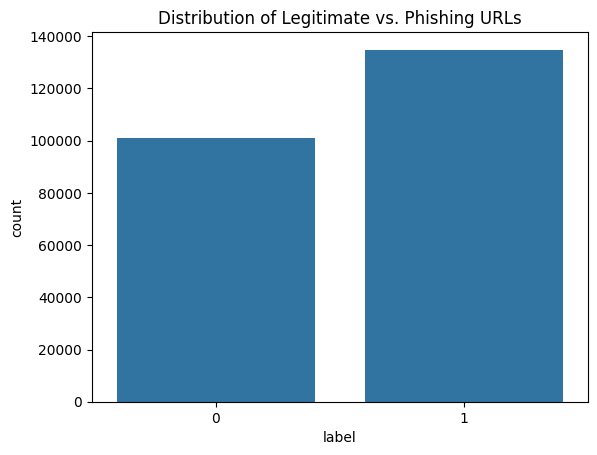

In [21]:
# Visualizations
sns.countplot(x='label', data=df)
plt.title("Distribution of Legitimate vs. Phishing URLs")
plt.show()

In [22]:
df.drop(columns=['FILENAME', 'URL', 'Title', 'Domain', 'TLD'], inplace=True)


FILENAME → Likely irrelevant for phishing detection; it just stores file names.

URL → A raw URL string isn’t directly useful; extracted features (length, subdomains, etc.) are more effective.

Title → Webpage titles may not be consistent or predictive for phishing classification.

Domain → Its effects (length, subdomains, patterns) are already captured by other numerical features.

TLD → Top-level domains (TLDs) may not significantly differentiate phishing from legitimate sites, and  TLDLegitimateProb, it helps assess how often a TLD appears in legitimate vs. phishing sites.

In [24]:
print(df.columns)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')


In [25]:
df.select_dtypes(include=[np.number]).skew().sort_values(ascending=True)

HasTitle                       -2.090195
IsHTTPS                        -1.370443
CharContinuationRate           -1.128591
URLCharProb                    -1.064291
URLSimilarityIndex             -0.989903
IsResponsive                   -0.514255
label                          -0.290602
URLTitleMatchScore             -0.089085
LetterRatioInURL               -0.066358
DomainTitleMatchScore          -0.008735
HasCopyrightInfo                0.052921
TLDLegitimateProb               0.073090
HasSocialNet                    0.174379
HasDescription                  0.241000
HasSubmitButton                 0.347949
HasHiddenFields                 0.504096
HasFavicon                      0.575358
Robots                          1.056024
SpacialCharRatioInURL           1.184134
Pay                             1.236906
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfURLRedirect                 2.155960
Bank                            2.239229
DomainLength    

In [26]:

# Select only numerical columns
numerical_features = df.select_dtypes(include=[np.number])

# Function to detect outliers using IQR
def detect_outliers(df):
    outlier_counts = {}
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for col in df.columns:
        outliers = ((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]))
        count = outliers.sum()
        if count > 0:
            outlier_counts[col] = count
            
    return outlier_counts

# Get features with outliers
outlier_dict = detect_outliers(numerical_features)
outlier_features = list(outlier_dict.keys())



In [27]:
# Display number of outliers per feature
print("Outlier Counts per Feature:")
for feature, count in outlier_dict.items():
    print(f"{feature}: {count} outliers")
    


Outlier Counts per Feature:
URLLength: 22493 outliers
DomainLength: 13474 outliers
IsDomainIP: 638 outliers
CharContinuationRate: 679 outliers
URLCharProb: 8569 outliers
TLDLength: 2134 outliers
NoOfSubDomain: 57389 outliers
HasObfuscation: 485 outliers
NoOfObfuscatedChar: 485 outliers
ObfuscationRatio: 485 outliers
NoOfLettersInURL: 19662 outliers
LetterRatioInURL: 1417 outliers
NoOfDegitsInURL: 51461 outliers
DegitRatioInURL: 51461 outliers
NoOfEqualsInURL: 5401 outliers
NoOfQMarkInURL: 6130 outliers
NoOfAmpersandInURL: 887 outliers
NoOfOtherSpecialCharsInURL: 12380 outliers
SpacialCharRatioInURL: 3344 outliers
IsHTTPS: 51256 outliers
LineOfCode: 19280 outliers
LargestLineLength: 17503 outliers
HasTitle: 32714 outliers
NoOfURLRedirect: 31464 outliers
NoOfSelfRedirect: 9457 outliers
NoOfPopup: 13411 outliers
NoOfiFrame: 34441 outliers
HasExternalFormSubmit: 10372 outliers
HasPasswordField: 24113 outliers
Bank: 29967 outliers
Pay: 55885 outliers
Crypto: 5535 outliers
NoOfImage: 18362 o

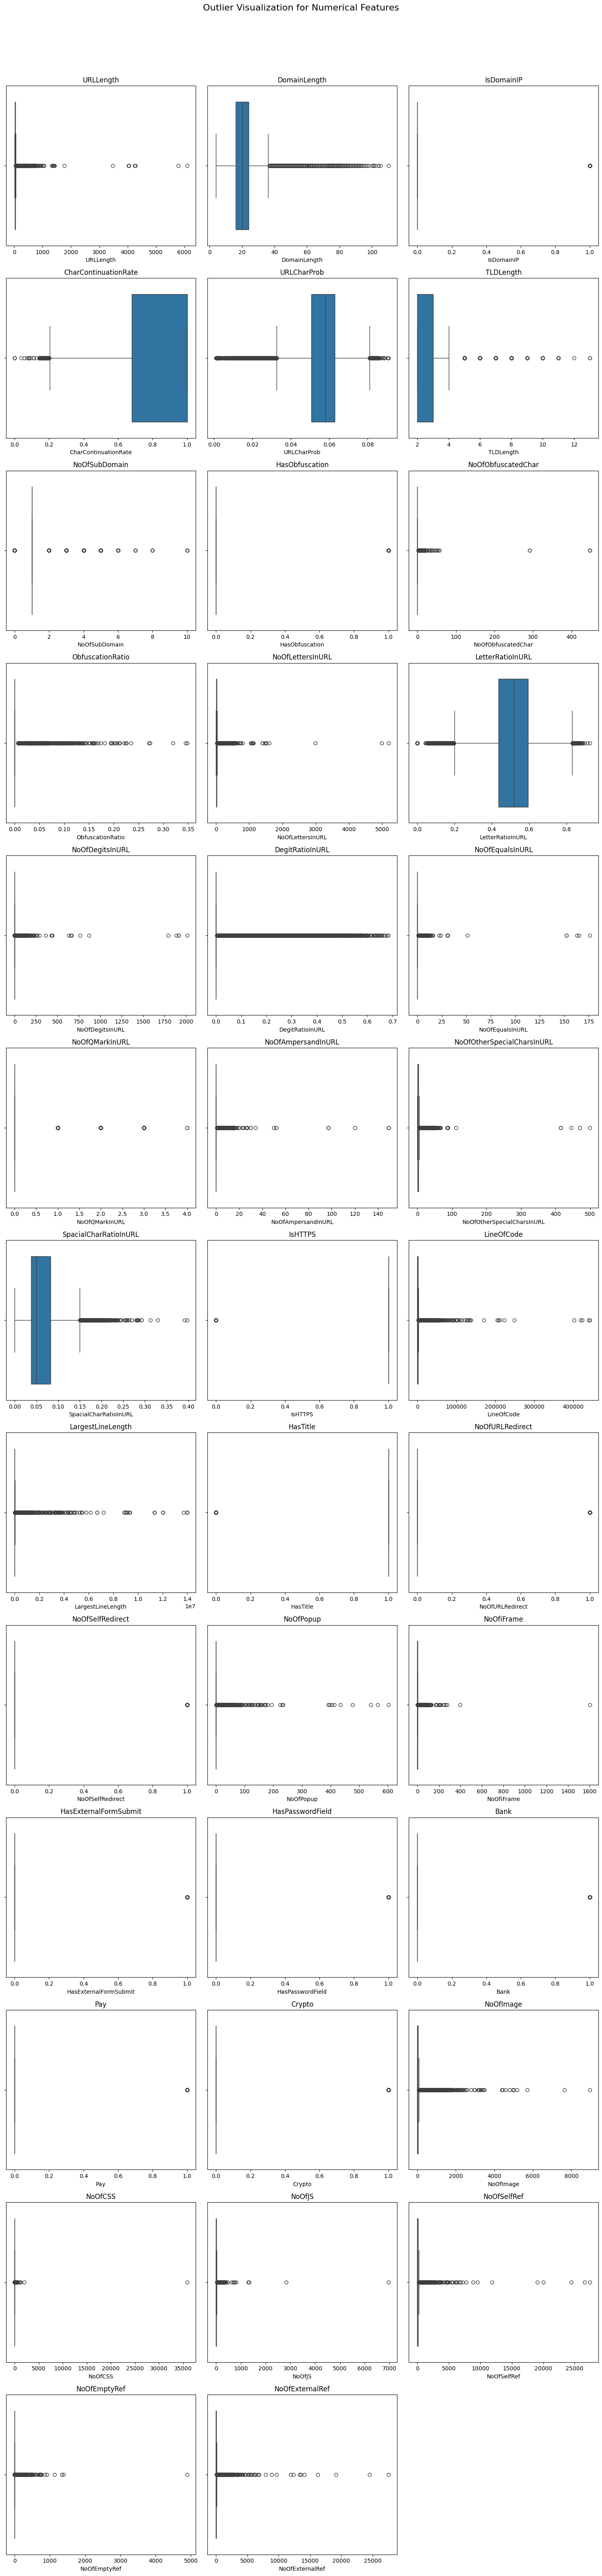

In [28]:
num_outlier_features = len(outlier_features)

    
cols = 3  # Number of columns for subplots
rows = (num_outlier_features + cols - 1) // cols  # Calculate rows needed


fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
fig.suptitle("Outlier Visualization for Numerical Features", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(outlier_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    
# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [29]:
#To find right skewed columns
right_skewed = df.skew()[df.skew() > 1].index.tolist()
df[right_skewed].skew()

URLLength                      53.321737
DomainLength                    2.513397
IsDomainIP                     19.146593
TLDLength                       1.663518
NoOfSubDomain                   1.809400
HasObfuscation                 21.981435
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmpersandInURL            106.717256
NoOfOtherSpecialCharsInURL     47.428522
SpacialCharRatioInURL           1.184134
LineOfCode                     53.072297
LargestLineLength              48.179926
Robots                          1.056024
NoOfURLRedirect                 2.155960
NoOfSelfRedirect                4.687797
NoOfPopup                      84.952694
NoOfiFrame                     97.677347
HasExternalFormSubmit           4.447479
HasPasswordField

In [30]:
from scipy.stats import boxcox
for col in right_skewed:
    skewness = df[col].skew()
    if skewness > 1:  # Highly skewed
        df[col], _ = boxcox(df[col] + 1) 
df[right_skewed].skew() 

URLLength                      0.095034
DomainLength                  -0.046918
IsDomainIP                    19.146593
TLDLength                     -0.014492
NoOfSubDomain                  0.035998
HasObfuscation                21.981435
NoOfObfuscatedChar            21.981435
ObfuscationRatio              21.981435
NoOfLettersInURL              -0.108138
NoOfDegitsInURL                1.390798
DegitRatioInURL                1.457255
NoOfEqualsInURL                6.378214
NoOfQMarkInURL                 5.957591
NoOfAmpersandInURL            16.212384
NoOfOtherSpecialCharsInURL     0.497004
SpacialCharRatioInURL          0.279246
LineOfCode                    -0.103982
LargestLineLength              0.013555
Robots                         1.056024
NoOfURLRedirect                2.155960
NoOfSelfRedirect               4.687797
NoOfPopup                      3.826578
NoOfiFrame                     0.802904
HasExternalFormSubmit          4.447479
HasPasswordField               2.625405


In [31]:
left_skewed = df.skew()[df.skew() <-1 ].index.tolist()
df[left_skewed].skew()

CharContinuationRate   -1.128591
URLCharProb            -1.064291
IsHTTPS                -1.370443
HasTitle               -2.090195
dtype: float64

In [32]:
# Applying square transformation for left skewed
for col in left_skewed:
     df[col] = df[col] ** 2
df[left_skewed].skew()

CharContinuationRate   -0.832204
URLCharProb            -0.399044
IsHTTPS                -1.370443
HasTitle               -2.090195
dtype: float64

In [33]:
# drop columns still highly skewed
highly_skewed = df.skew()[df.skew() > 1].index.tolist()
df.drop(columns=highly_skewed, inplace=True)


In [34]:
df.skew()

URLLength                     0.095034
DomainLength                 -0.046918
URLSimilarityIndex           -0.989903
CharContinuationRate         -0.832204
TLDLegitimateProb             0.073090
URLCharProb                  -0.399044
TLDLength                    -0.014492
NoOfSubDomain                 0.035998
NoOfLettersInURL             -0.108138
LetterRatioInURL             -0.066358
NoOfOtherSpecialCharsInURL    0.497004
SpacialCharRatioInURL         0.279246
IsHTTPS                      -1.370443
LineOfCode                   -0.103982
LargestLineLength             0.013555
HasTitle                     -2.090195
DomainTitleMatchScore        -0.008735
URLTitleMatchScore           -0.089085
HasFavicon                    0.575358
IsResponsive                 -0.514255
HasDescription                0.241000
NoOfiFrame                    0.802904
HasSocialNet                  0.174379
HasSubmitButton               0.347949
HasHiddenFields               0.504096
HasCopyrightInfo         

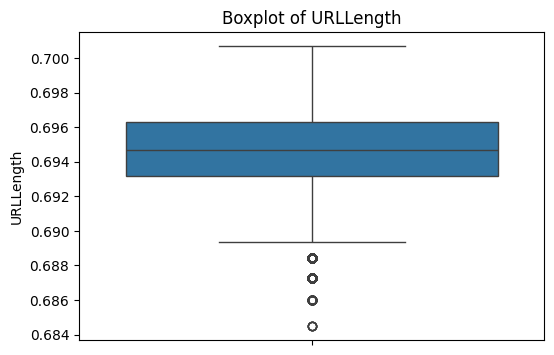

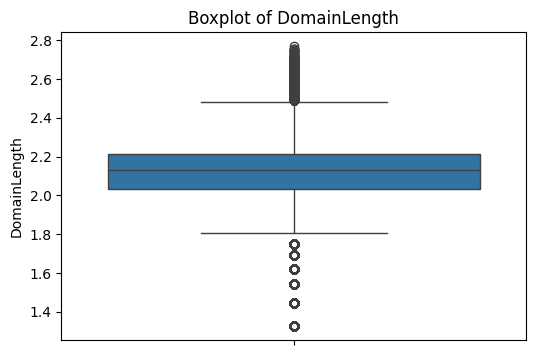

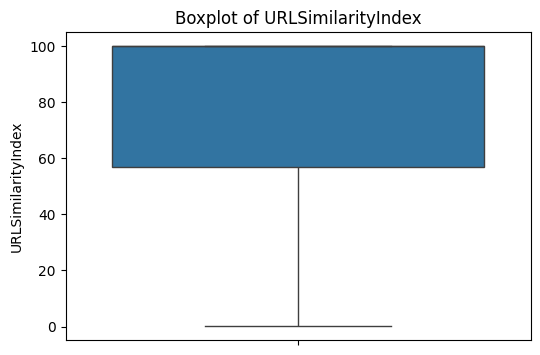

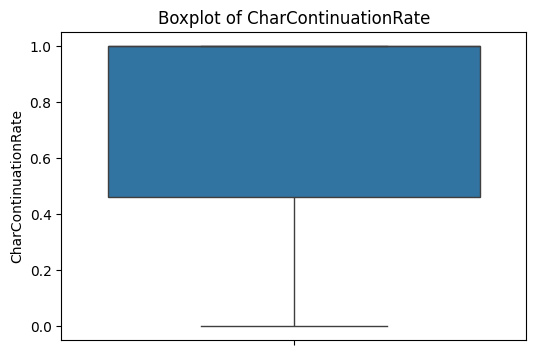

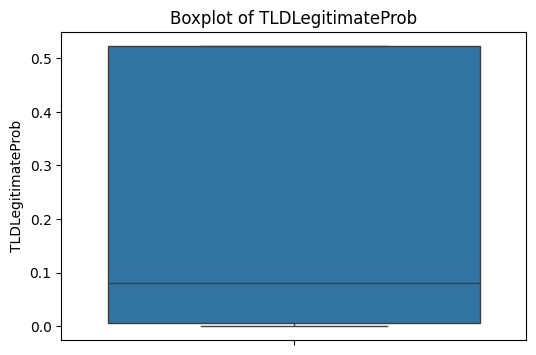

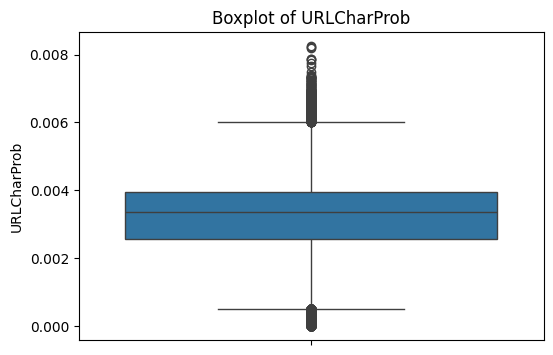

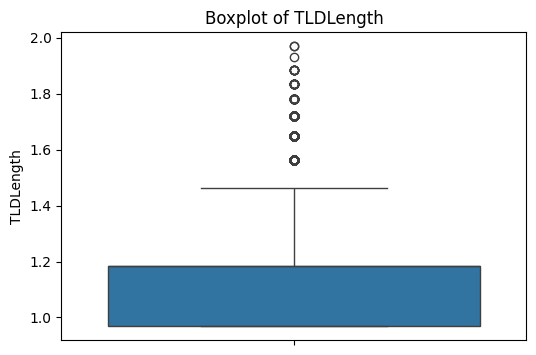

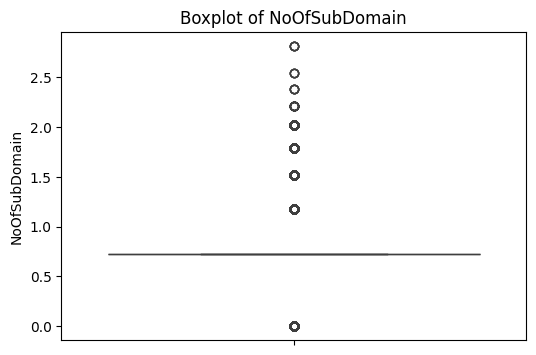

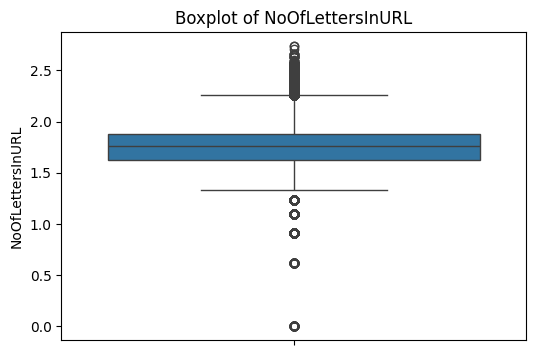

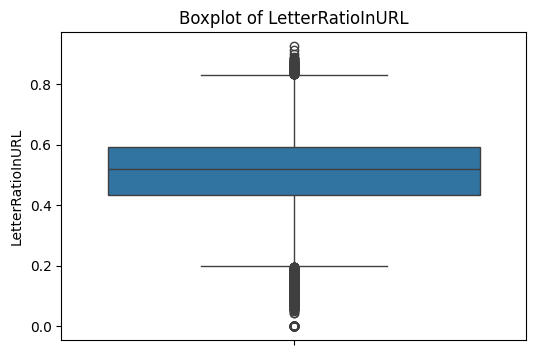

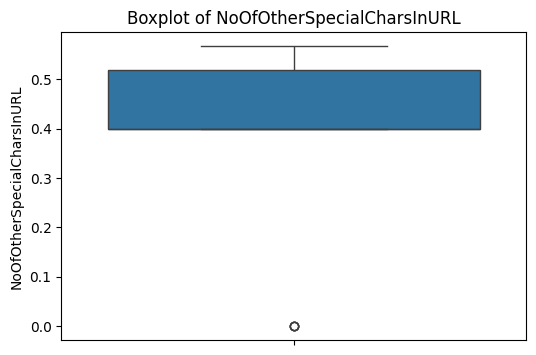

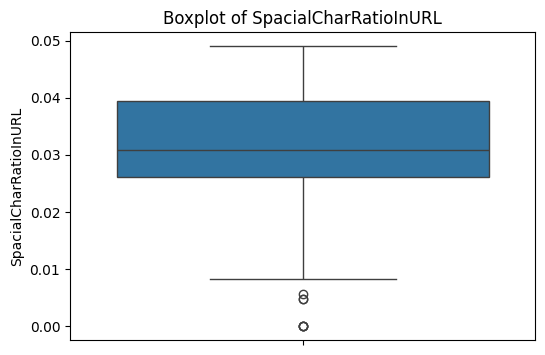

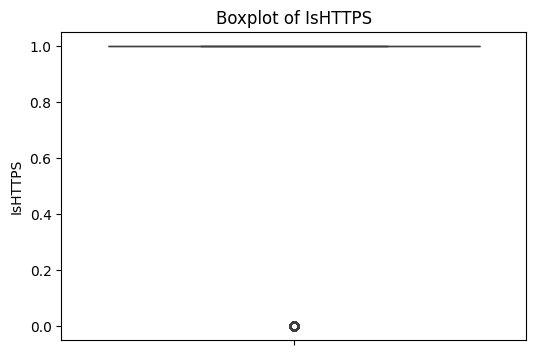

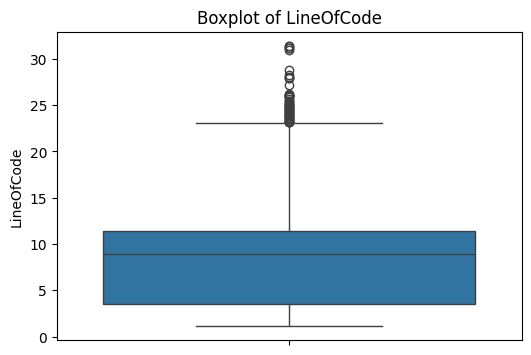

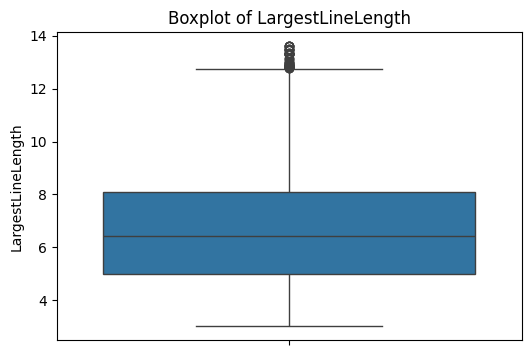

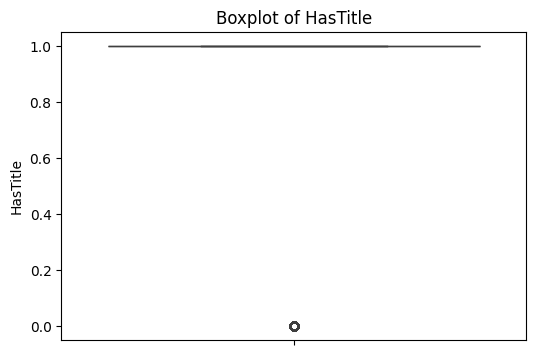

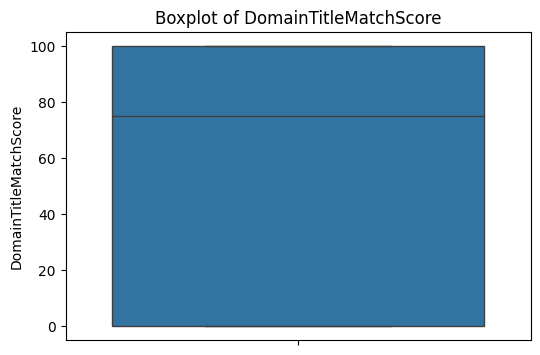

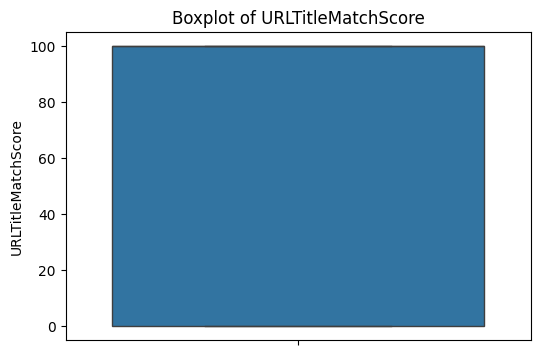

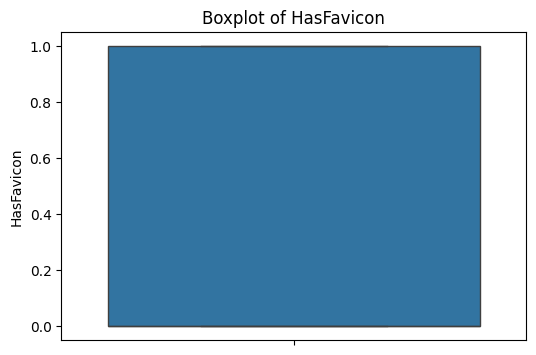

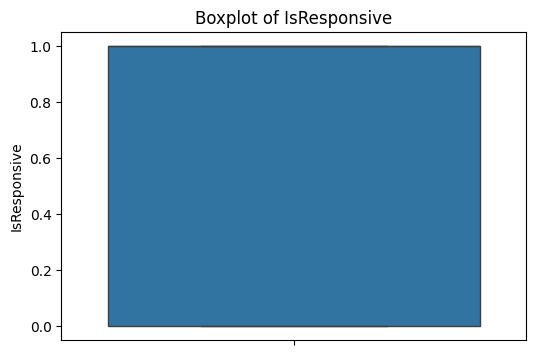

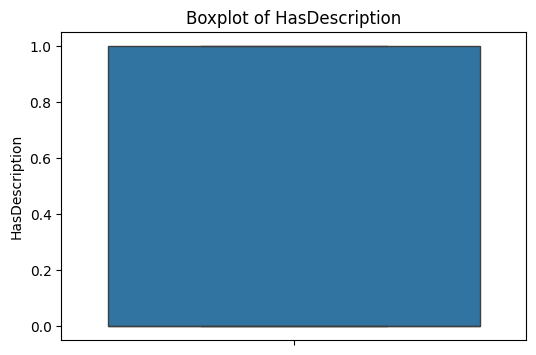

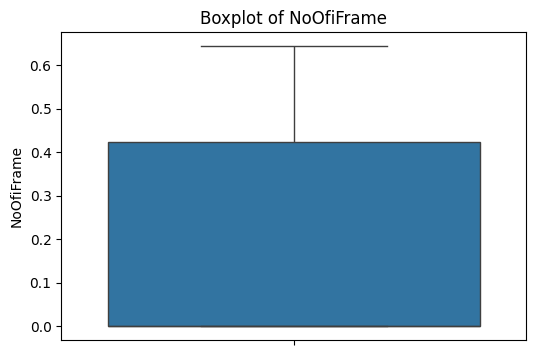

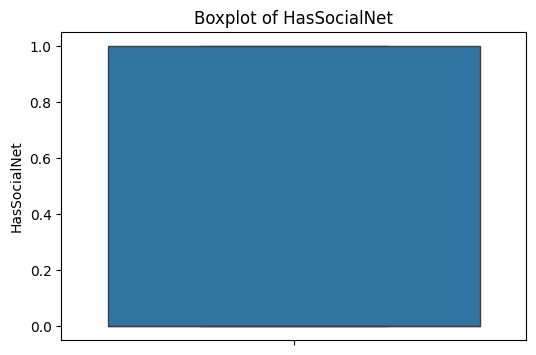

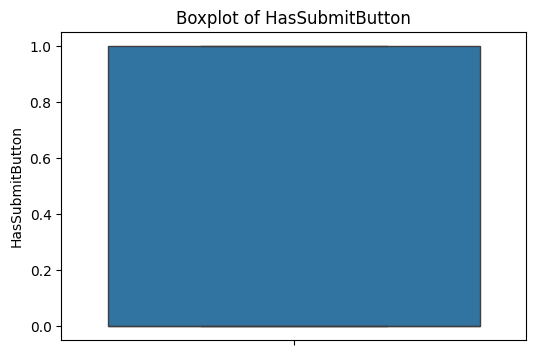

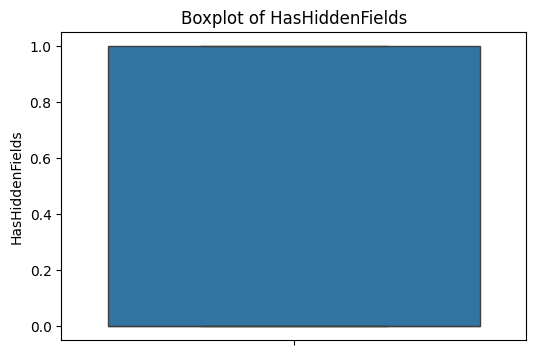

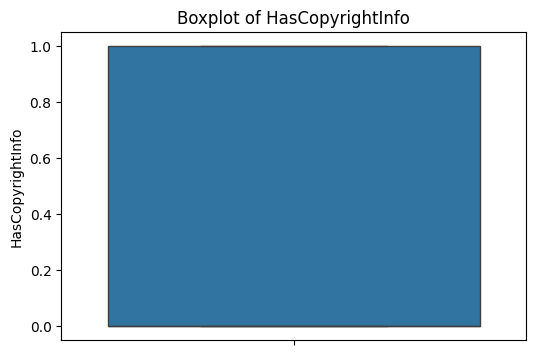

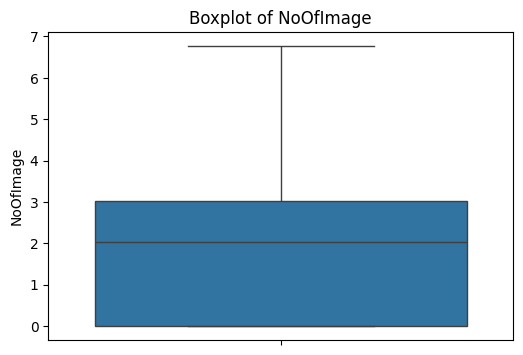

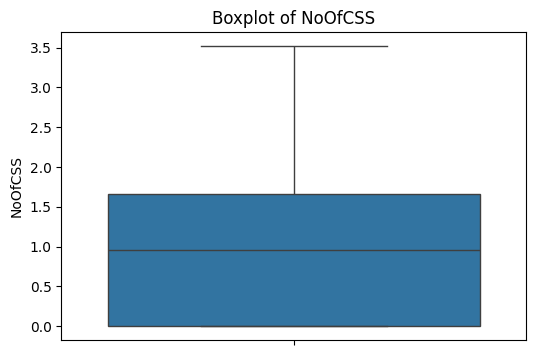

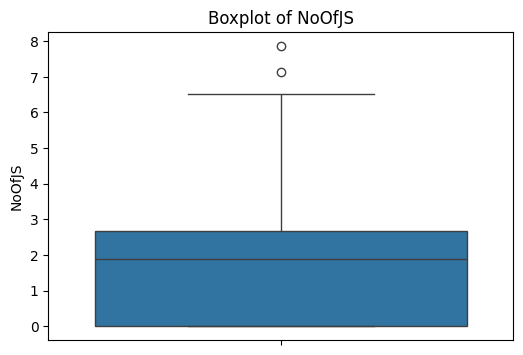

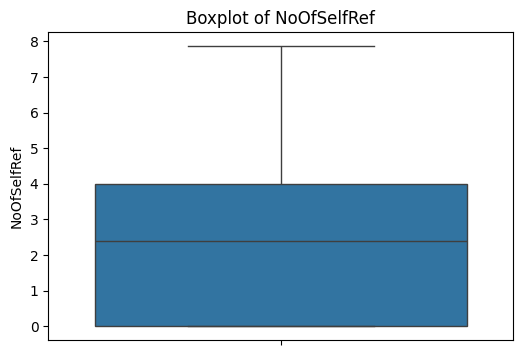

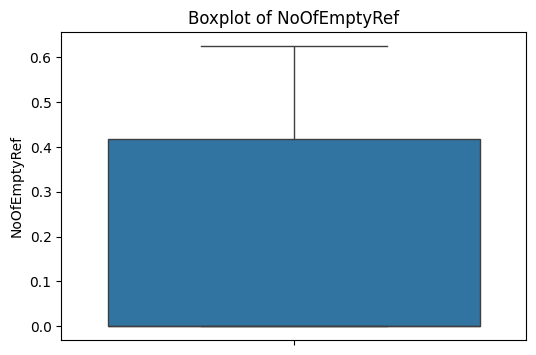

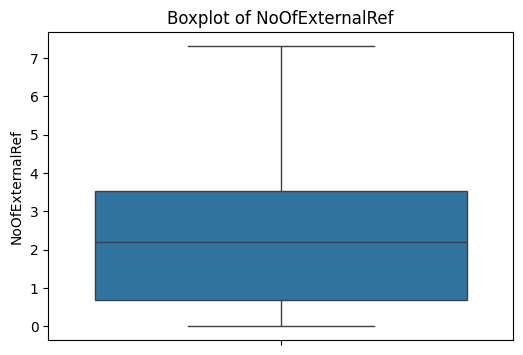

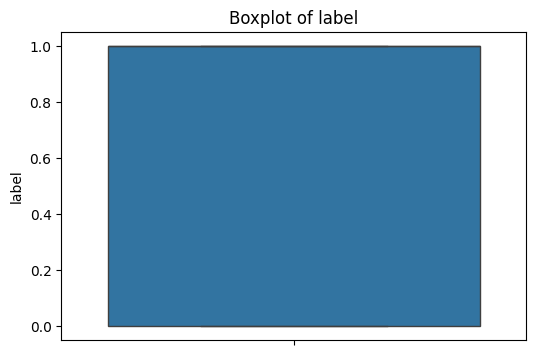

In [35]:
for col in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [36]:
df.select_dtypes(include=[np.number]).skew().sort_values(ascending=True)

HasTitle                     -2.090195
IsHTTPS                      -1.370443
URLSimilarityIndex           -0.989903
CharContinuationRate         -0.832204
IsResponsive                 -0.514255
URLCharProb                  -0.399044
label                        -0.290602
NoOfLettersInURL             -0.108138
LineOfCode                   -0.103982
URLTitleMatchScore           -0.089085
LetterRatioInURL             -0.066358
DomainLength                 -0.046918
TLDLength                    -0.014492
DomainTitleMatchScore        -0.008735
LargestLineLength             0.013555
NoOfJS                        0.017867
NoOfSubDomain                 0.035998
HasCopyrightInfo              0.052921
NoOfImage                     0.057420
NoOfExternalRef               0.061736
NoOfSelfRef                   0.066672
TLDLegitimateProb             0.073090
URLLength                     0.095034
NoOfCSS                       0.140952
HasSocialNet                  0.174379
HasDescription           

In [37]:
df_cleaned =df.copy()

In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  float64
 1   DomainLength                235795 non-null  float64
 2   URLSimilarityIndex          235795 non-null  float64
 3   CharContinuationRate        235795 non-null  float64
 4   TLDLegitimateProb           235795 non-null  float64
 5   URLCharProb                 235795 non-null  float64
 6   TLDLength                   235795 non-null  float64
 7   NoOfSubDomain               235795 non-null  float64
 8   NoOfLettersInURL            235795 non-null  float64
 9   LetterRatioInURL            235795 non-null  float64
 10  NoOfOtherSpecialCharsInURL  235795 non-null  float64
 11  SpacialCharRatioInURL       235795 non-null  float64
 12  IsHTTPS                     235795 non-null  int64  
 13  LineOfCode    

## 6. **Exploratory Data Analysis (EDA):**

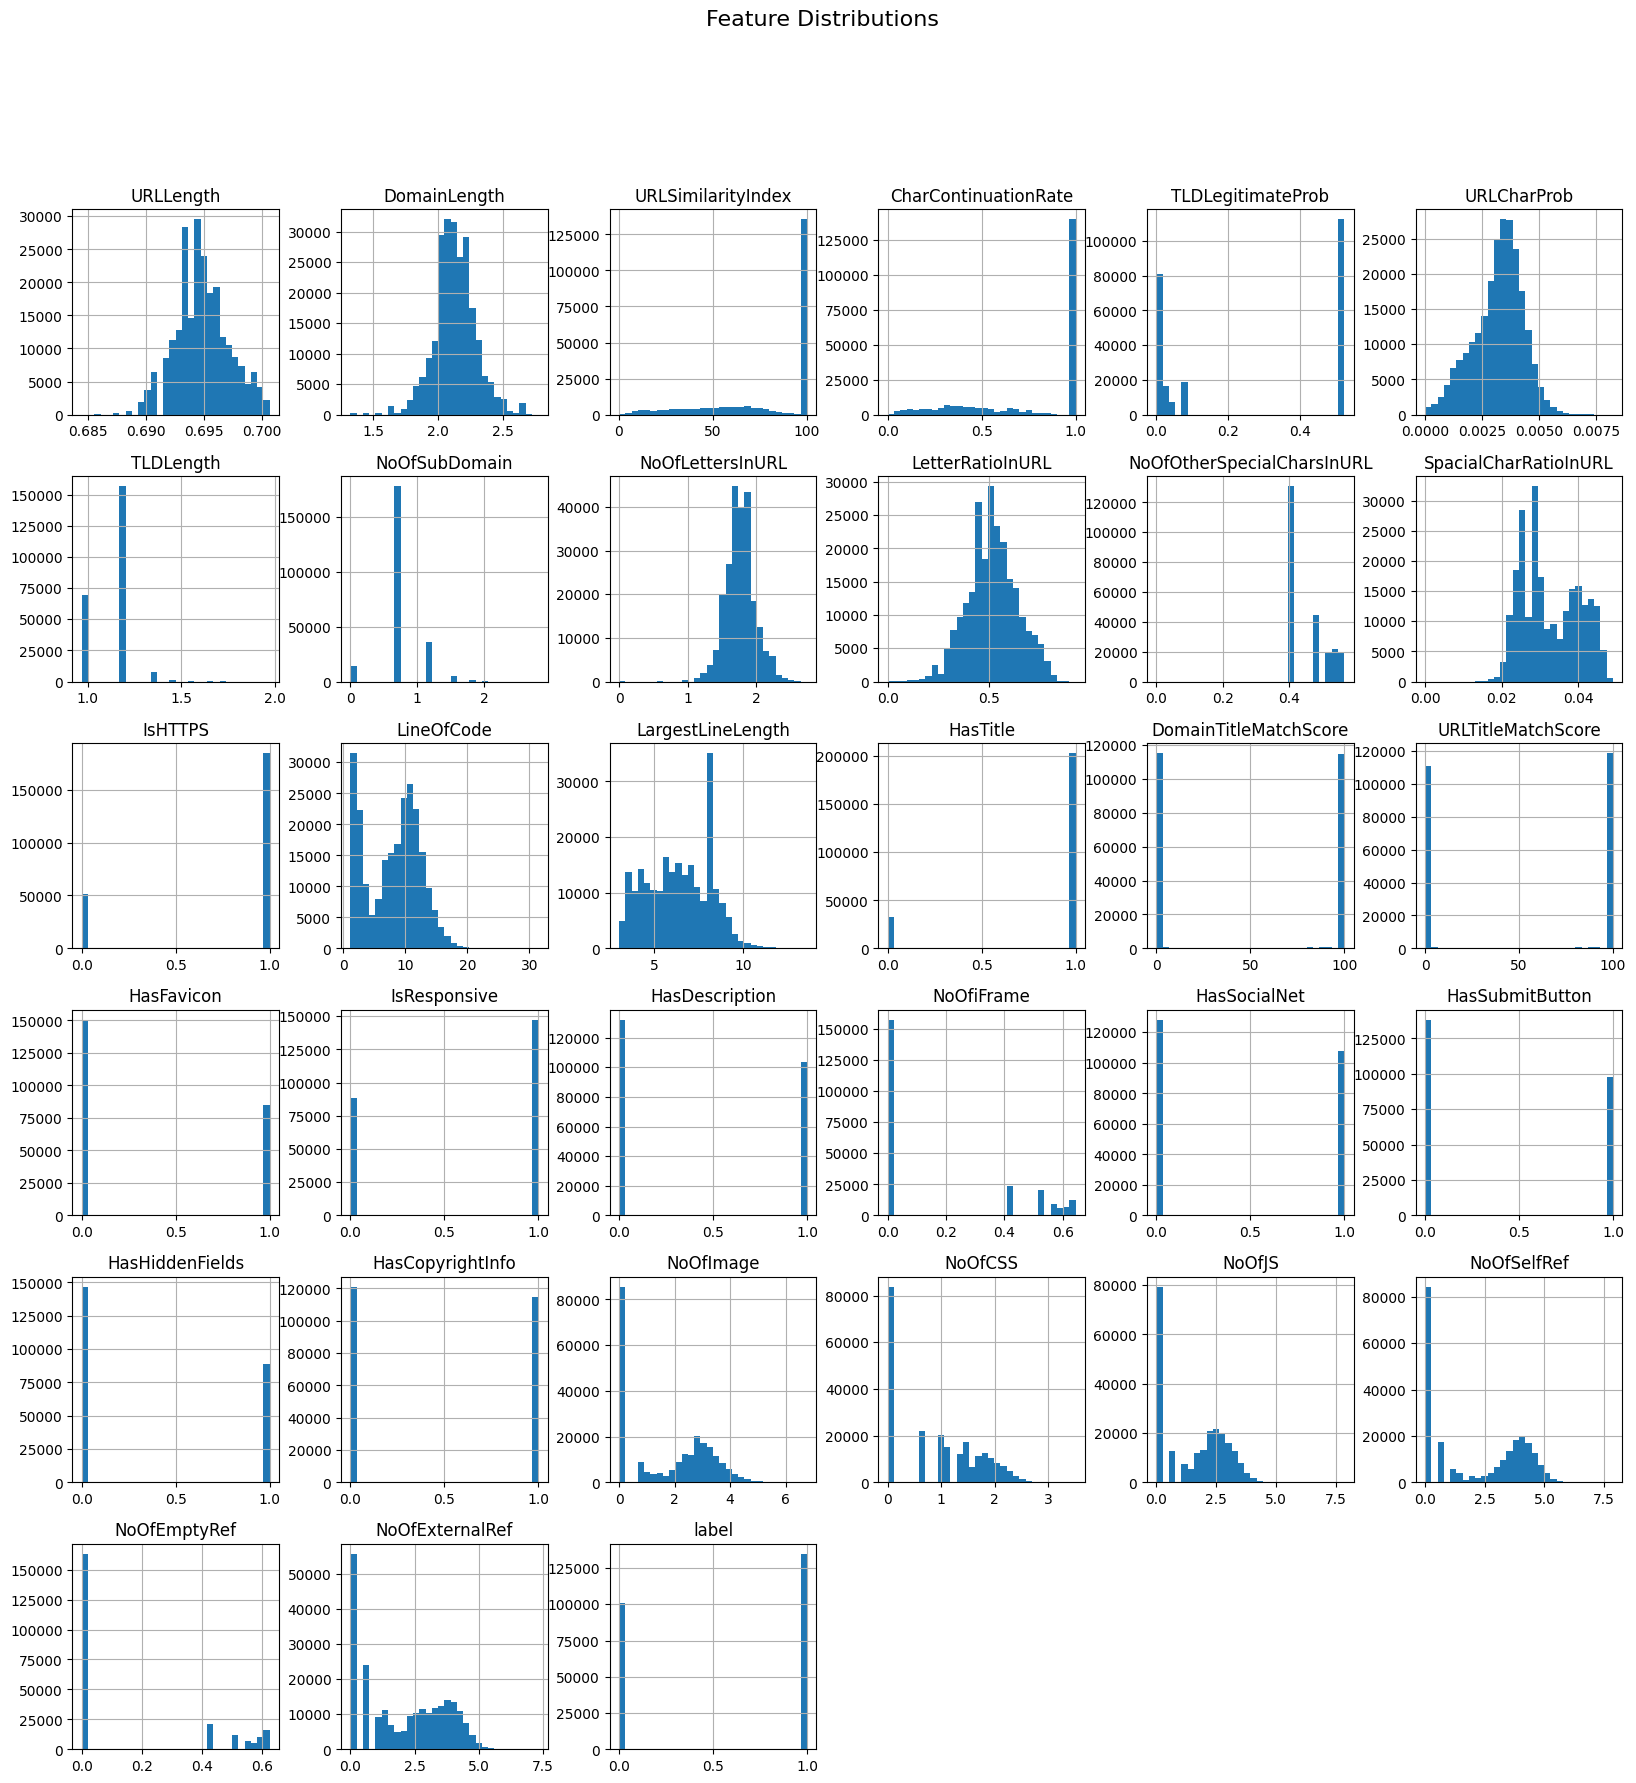

In [40]:

df_cleaned.hist(figsize=(20, 20), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [41]:
constant_features = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]
print("Constant Features:", constant_features)


Constant Features: []


In [42]:
df_cleaned.fillna(df_cleaned.median(), inplace=True)

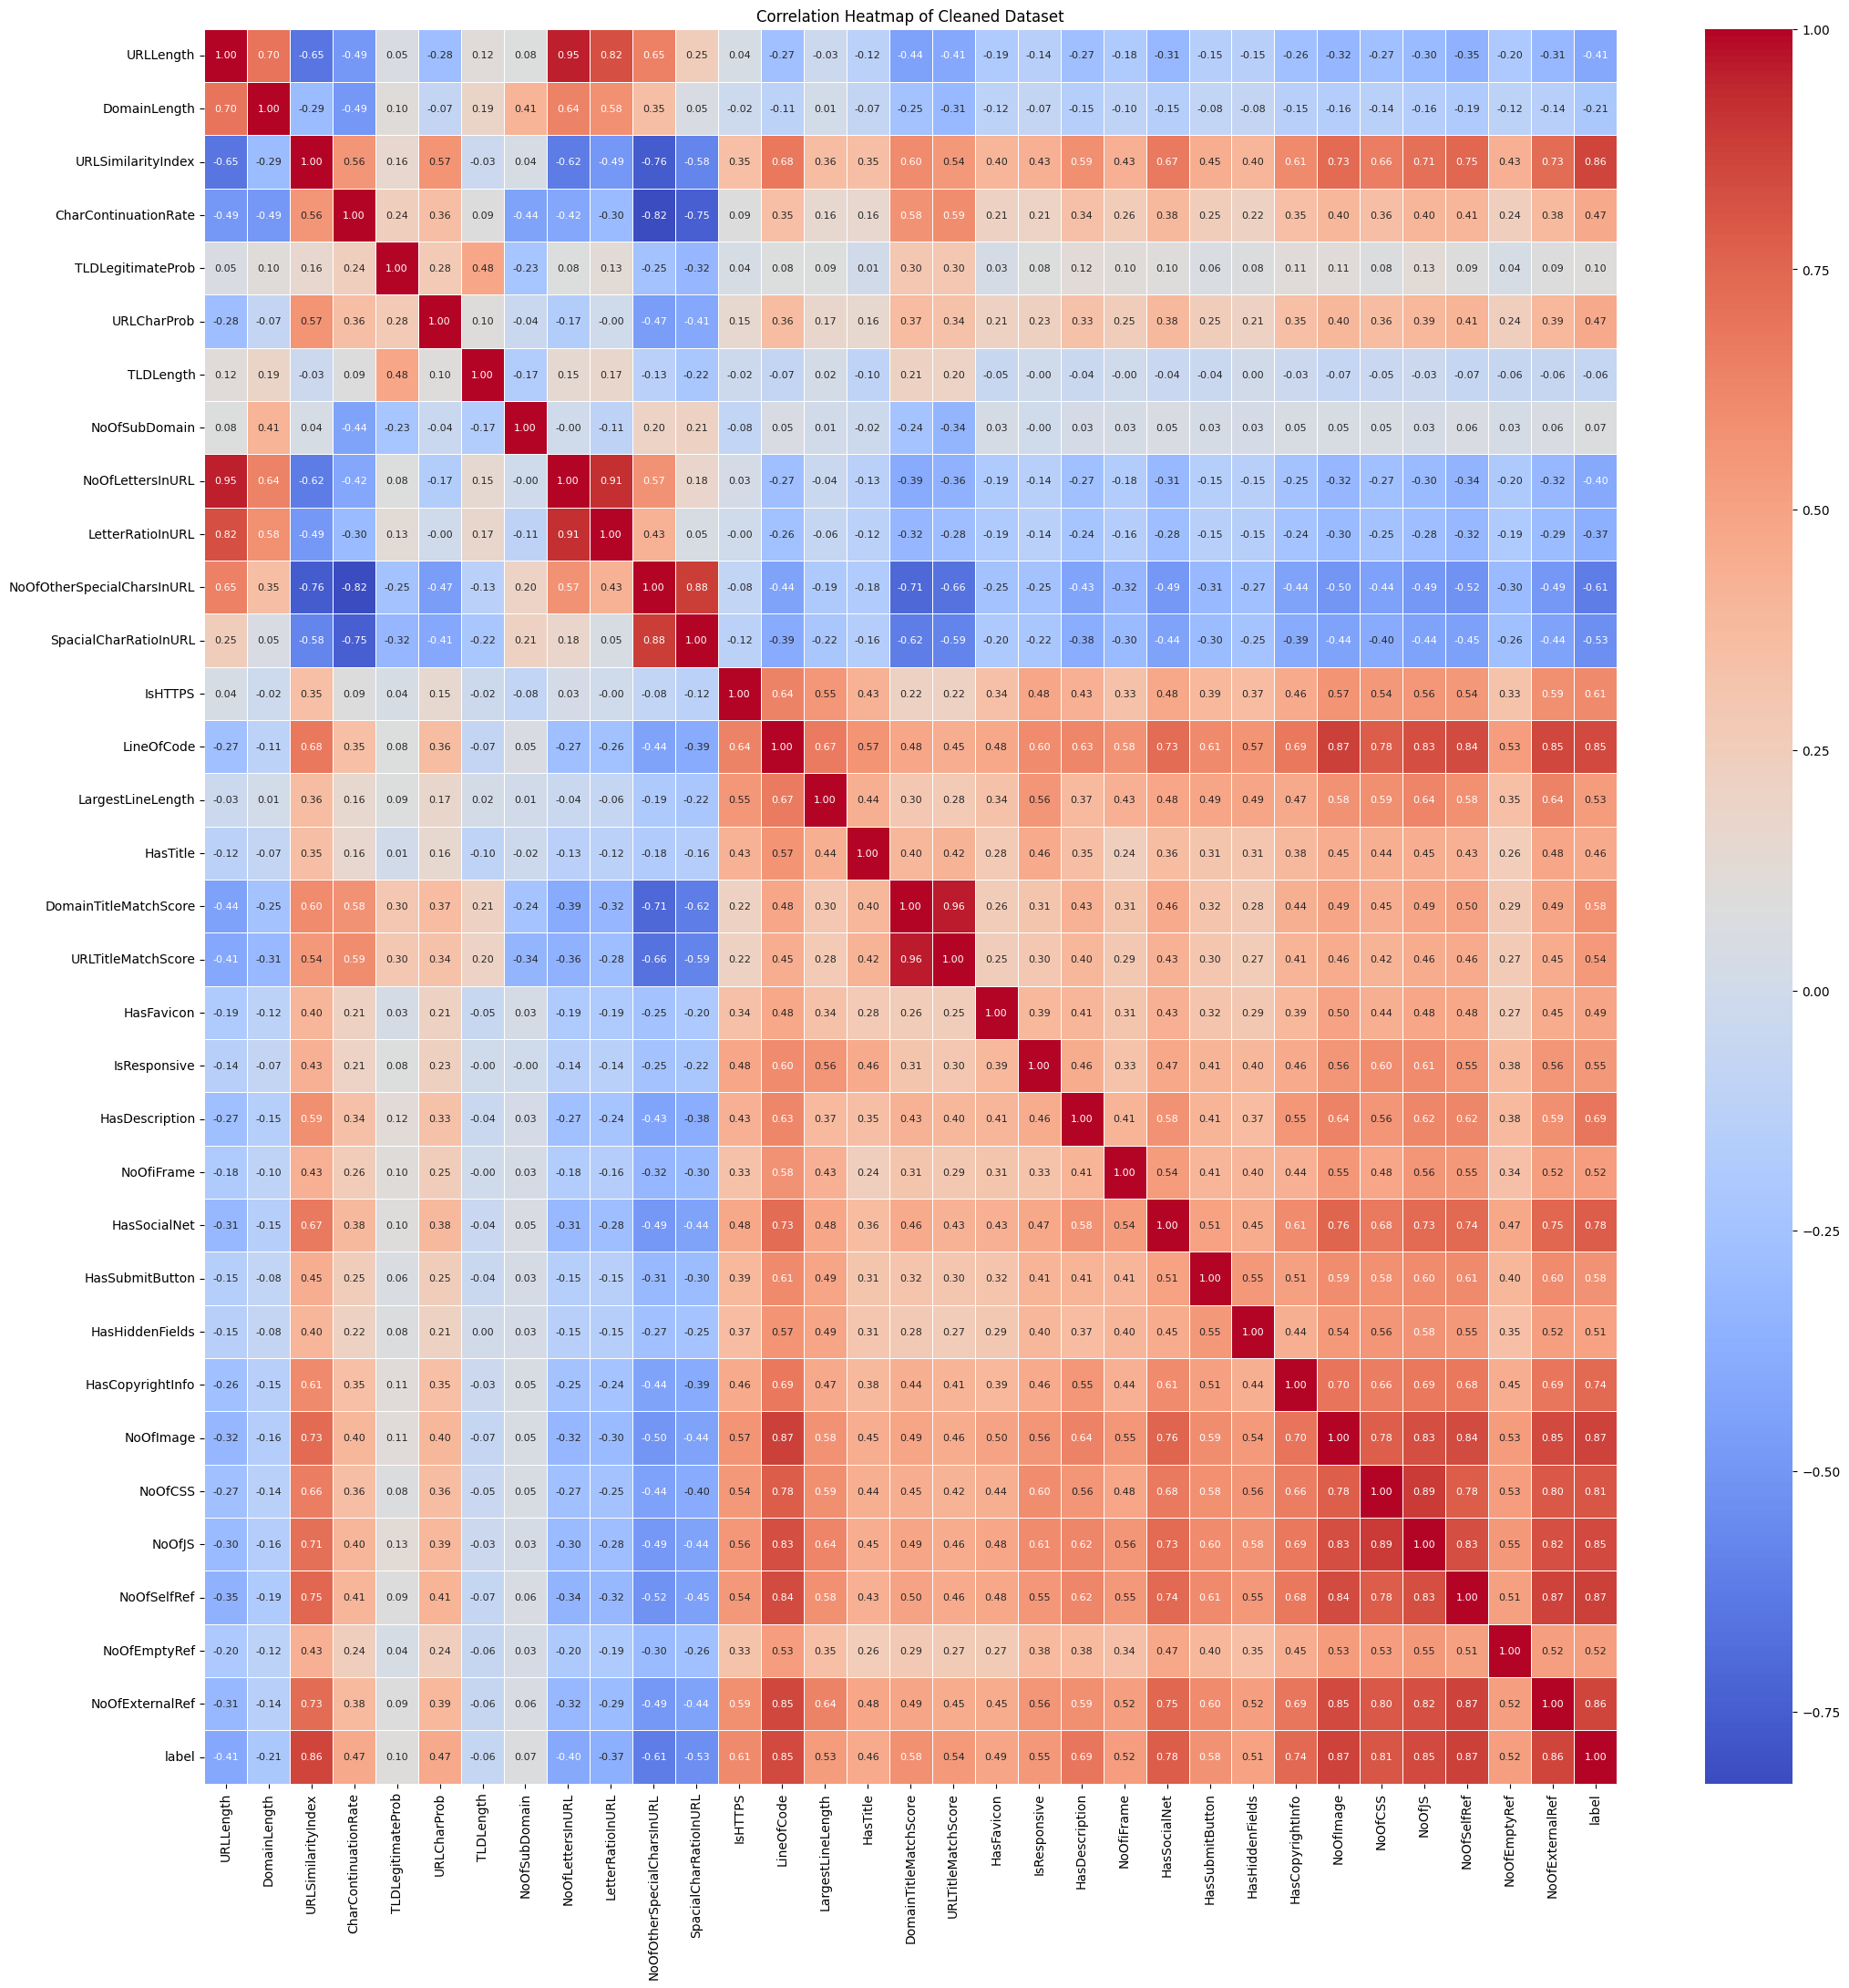

Highly correlated features (above 0.85 threshold): ['NoOfLettersInURL', 'LetterRatioInURL', 'SpacialCharRatioInURL', 'URLTitleMatchScore', 'NoOfImage', 'NoOfJS', 'NoOfExternalRef', 'label']


In [43]:

# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Set up the figure
plt.figure(figsize=(25, 25))

# Create a heatmap with correlation values displayed
sns.heatmap(
    correlation_matrix, 
    cmap='coolwarm', 
    annot=True,  # Display correlation values
    fmt=".2f",  # Format decimal places
    linewidths=0.5,
    annot_kws={"size": 8}  # Set annotation font size
)

plt.title("Correlation Heatmap of Cleaned Dataset")
plt.show()

# Identify highly correlated features (Threshold > 0.85)
correlation_threshold = 0.85
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features that are highly correlated
highly_correlated_features = [col for col in upper_triangle.columns if any(upper_triangle[col] > correlation_threshold)]
print(f"Highly correlated features (above {correlation_threshold} threshold): {highly_correlated_features}")


In [44]:
df_cleaned[['NoOfImage', 'NoOfJS', 'NoOfExternalRef', 'label']].corr()


,NoOfImage,NoOfJS,NoOfExternalRef,label
NoOfImage,1.000000,0.834422,0.845512,0.867367
NoOfJS,0.834422,1.000000,0.824029,0.845733
NoOfExternalRef,0.845512,0.824029,1.000000,0.863774
label,0.867367,0.845733,0.863774,1.000000


In [45]:
df_cleaned[['SpacialCharRatioInURL','NoOfOtherSpecialCharsInURL' ,'label']].corr()

,SpacialCharRatioInURL,NoOfOtherSpecialCharsInURL,label
SpacialCharRatioInURL,1.000000,0.878861,-0.534947
NoOfOtherSpecialCharsInURL,0.878861,1.000000,-0.612807
label,-0.534947,-0.612807,1.000000


In [46]:
df_cleaned[['NoOfLettersInURL','LetterRatioInURL','label']].corr()

,NoOfLettersInURL,LetterRatioInURL,label
NoOfLettersInURL,1.000000,0.914614,-0.401922
LetterRatioInURL,0.914614,1.000000,-0.367794
label,-0.401922,-0.367794,1.000000


NoOfImage has the **highest correlation with label (0.867)** so drop the rest.

NoOfOtherSpecialCharsInURL (| -0.612 |) is stronger than SpacialCharRatioInURL → Keep NoOfOtherSpecialCharsInURL

NoOfLettersInURL (| -0.402 |) is stronger than LetterRatioInURL → Keep NoOfLettersInURL

In [48]:
df_cleaned.drop(columns=['LetterRatioInURL','NoOfJS', 'NoOfExternalRef','SpacialCharRatioInURL'],inplace=True) 

In [49]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  float64
 1   DomainLength                235795 non-null  float64
 2   URLSimilarityIndex          235795 non-null  float64
 3   CharContinuationRate        235795 non-null  float64
 4   TLDLegitimateProb           235795 non-null  float64
 5   URLCharProb                 235795 non-null  float64
 6   TLDLength                   235795 non-null  float64
 7   NoOfSubDomain               235795 non-null  float64
 8   NoOfLettersInURL            235795 non-null  float64
 9   NoOfOtherSpecialCharsInURL  235795 non-null  float64
 10  IsHTTPS                     235795 non-null  int64  
 11  LineOfCode                  235795 non-null  float64
 12  LargestLineLength           235795 non-null  float64
 13  HasTitle      

## 7. **Feature Selection:**

In [51]:
# Feature Selection
X = df_cleaned.drop(columns=['label'])  
y = df_cleaned['label']

In [52]:
y.value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

In [53]:
from sklearn.feature_selection import  SelectKBest, f_classif

# Select top k features
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = set(X.columns[selector.get_support()])

# Manually add important features
important_features = {"TLDLegitimateProb"}
final_selected_features = list(selected_features.union(important_features))

# Ensure selected features exist in the original dataset
final_selected_features = [feature for feature in final_selected_features if feature in X.columns]

# Create final DataFrame with selected features
X_selected_final = X[final_selected_features]

print("Final Selected Features:", X_selected_final.columns.tolist())


Final Selected Features: ['URLCharProb', 'LineOfCode', 'URLSimilarityIndex', 'TLDLegitimateProb', 'HasFavicon', 'NoOfiFrame', 'LargestLineLength', 'NoOfCSS', 'HasDescription', 'NoOfImage', 'DomainTitleMatchScore', 'HasCopyrightInfo', 'NoOfSelfRef', 'HasHiddenFields', 'URLTitleMatchScore', 'IsResponsive', 'NoOfOtherSpecialCharsInURL', 'HasSocialNet', 'IsHTTPS', 'HasSubmitButton', 'NoOfEmptyRef']


## 8. **Feature Scaling:**

In [55]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Balancing Classes 
if y.value_counts()[0] != y.value_counts()[1]:
    sm = SMOTE()
    X_scaled, y = sm.fit_resample(X_scaled, y)
    print("\nAfter SMOTE Balancing:")
    print(y.value_counts())


After SMOTE Balancing:
label
1    134850
0    134850
Name: count, dtype: int64


## 9. **Split Data into Training and Testing Sets:**

In [57]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nShapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)



Shapes:
X_train: (215760, 20)
y_train: (215760,)
X_test: (53940, 20)
y_test: (53940,)
